In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('bright')

In [376]:
import warnings
warnings.filterwarnings('ignore')

In [377]:
wqi = pd.read_csv('combined-method-wqi-data.csv')
wqi

,DISTRICT,LOCATION,PH,EC,TDS,TH,CA,MG,NA,K,...,F,ALK,YEAR,SAR,WQI,WQI_CLASSIF,EWQI,EWQI_CLASSIF,CCME-WQI,CCME-WQI_CLASSIF
0,Ahmedabad,Barvala,8.25,5090.0,3410.0,450.0,80.0,60.0,937.0,0.3,...,2.80,730.0,2017,NaN,179.179174,Unsuitable,307.655924,Unsuitable,226.995159,NaN
1,Ahmedabad,Dhandhuka1,8.23,14210.0,9521.0,1300.0,180.0,207.0,3220.0,9.9,...,6.64,830.0,2017,NaN,503.168402,Unsuitable,1274.533598,Unsuitable,636.464313,NaN
2,Ahmedabad,Endla,8.17,685.0,459.0,220.0,52.0,22.0,49.0,13.6,...,0.44,250.0,2017,NaN,39.979871,Good,59.095708,Poor,246.641801,NaN
3,Ahmedabad,Kumarkhan,8.19,10660.0,7142.0,800.0,140.0,109.0,1875.0,7.2,...,11.20,810.0,2017,NaN,623.628660,Unsuitable,636.424848,Unsuitable,554.178212,NaN
4,Ahmedabad,Kundali,8.03,1300.0,871.0,280.0,64.0,29.0,210.0,3.7,...,0.50,250.0,2017,NaN,57.007405,Poor,151.448314,Unsuitable,251.737958,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,Kutchch,Desalpur,7.42,768.0,515.0,180.0,40.0,19.0,95.0,10.0,...,0.15,150.0,2021,3.08,17.533385,Excellent,55.241104,Poor,304.369604,NaN
2760,Kutchch,Ratanpar Khadir,7.73,4419.0,2961.0,701.0,96.0,112.0,712.0,17.0,...,0.78,330.0,2021,11.70,74.851919,Poor,287.785086,Unsuitable,351.107792,NaN
2761,Kutchch,Rapar,7.60,2942.0,1971.0,400.0,132.0,17.0,552.0,26.0,...,0.93,230.0,2021,12.00,67.464524,Poor,196.862044,Unsuitable,158.335265,NaN
2762,Kutchch,Kuda,7.35,1464.0,981.0,410.0,104.0,36.0,125.0,18.0,...,1.04,500.0,2021,2.68,69.255678,Poor,102.900091,Unsuitable,15.636121,Poor


In [378]:
len(wqi['CCME-WQI_CLASSIF'])

2764

In [379]:
len(wqi['WQI_CLASSIF'])

2764

In [380]:
wqi['CCME-WQI_CLASSIF'].value_counts()

CCME-WQI_CLASSIF
Fair         138
Good          69
Poor          19
Excellent      7
Marginal       1
Name: count, dtype: int64

In [381]:
print(wqi['WQI_CLASSIF'].value_counts())
print(wqi['EWQI_CLASSIF'].value_counts())
print(wqi['CCME-WQI_CLASSIF'].value_counts())

WQI_CLASSIF
Good          1032
Poor           785
Unsuitable     441
Very Poor      397
Excellent      109
Name: count, dtype: int64
EWQI_CLASSIF
Unsuitable    1549
Poor           541
Very Poor      478
Good           195
Excellent        1
Name: count, dtype: int64
CCME-WQI_CLASSIF
Fair         138
Good          69
Poor          19
Excellent      7
Marginal       1
Name: count, dtype: int64


In [382]:
# print(wqi[['WQI_CLASSIF']].value_counts())
# print(wqi[['EWQI_CLASSIF']].value_counts())
# print(wqi[['CCME-WQI_CLASSIF']].value_counts())
# print('-'*50)

# # for both wqi_classif and ewqi_classif convert excellent to good
# wqi['WQI_CLASSIF'] = wqi['WQI_CLASSIF'].replace(['Excellent'], 'Good')
# wqi['EWQI_CLASSIF'] = wqi['EWQI_CLASSIF'].replace(['Excellent'], 'Good')
# wqi['CCME-WQI_CLASSIF'] = wqi['CCME-WQI_CLASSIF'].replace(['Marginal'], 'Fair')

# print(wqi[['WQI_CLASSIF']].value_counts())
# print(wqi[['EWQI_CLASSIF']].value_counts())
# print(wqi[['CCME-WQI_CLASSIF']].value_counts())
# print('-'*50)

wqi['WQI_CLASSIF'] = wqi['WQI_CLASSIF'].replace({'Excellent':0, 'Good':1, 'Poor':2, 'Very Poor':3, 'Unsuitable':4})
wqi['EWQI_CLASSIF'] = wqi['EWQI_CLASSIF'].replace({'Excellent':0, 'Good':1, 'Poor':2, 'Very Poor':3, 'Unsuitable':4})
wqi['CCME-WQI_CLASSIF'] = wqi['CCME-WQI_CLASSIF'].replace({'Excellent':0, 'Good':1, 'Fair':2, 'Marginal':3, 'Poor':4})

# print(wqi[['WQI_CLASSIF']].value_counts())
# print(wqi[['EWQI_CLASSIF']].value_counts())
# print(wqi[['CCME-WQI_CLASSIF']].value_counts())
# print('-'*50)

In [383]:
import numpy as np

(wqi[['DISTRICT','LOCATION']].value_counts() >= 5).sum()

72

In [384]:
wqi[(wqi['DISTRICT']=='Valsad') & (wqi['LOCATION']=='Wankal')]['YEAR']

1624    2019
Name: YEAR, dtype: int64

In [385]:
wqi

,DISTRICT,LOCATION,PH,EC,TDS,TH,CA,MG,NA,K,...,F,ALK,YEAR,SAR,WQI,WQI_CLASSIF,EWQI,EWQI_CLASSIF,CCME-WQI,CCME-WQI_CLASSIF
0,Ahmedabad,Barvala,8.25,5090.0,3410.0,450.0,80.0,60.0,937.0,0.3,...,2.80,730.0,2017,NaN,179.179174,4,307.655924,4,226.995159,NaN
1,Ahmedabad,Dhandhuka1,8.23,14210.0,9521.0,1300.0,180.0,207.0,3220.0,9.9,...,6.64,830.0,2017,NaN,503.168402,4,1274.533598,4,636.464313,NaN
2,Ahmedabad,Endla,8.17,685.0,459.0,220.0,52.0,22.0,49.0,13.6,...,0.44,250.0,2017,NaN,39.979871,1,59.095708,2,246.641801,NaN
3,Ahmedabad,Kumarkhan,8.19,10660.0,7142.0,800.0,140.0,109.0,1875.0,7.2,...,11.20,810.0,2017,NaN,623.628660,4,636.424848,4,554.178212,NaN
4,Ahmedabad,Kundali,8.03,1300.0,871.0,280.0,64.0,29.0,210.0,3.7,...,0.50,250.0,2017,NaN,57.007405,2,151.448314,4,251.737958,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,Kutchch,Desalpur,7.42,768.0,515.0,180.0,40.0,19.0,95.0,10.0,...,0.15,150.0,2021,3.08,17.533385,0,55.241104,2,304.369604,NaN
2760,Kutchch,Ratanpar Khadir,7.73,4419.0,2961.0,701.0,96.0,112.0,712.0,17.0,...,0.78,330.0,2021,11.70,74.851919,2,287.785086,4,351.107792,NaN
2761,Kutchch,Rapar,7.60,2942.0,1971.0,400.0,132.0,17.0,552.0,26.0,...,0.93,230.0,2021,12.00,67.464524,2,196.862044,4,158.335265,NaN
2762,Kutchch,Kuda,7.35,1464.0,981.0,410.0,104.0,36.0,125.0,18.0,...,1.04,500.0,2021,2.68,69.255678,2,102.900091,4,15.636121,4.0


## 1. Regression

In [386]:
# import all other regression models available in different libraries
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge

# import metrics to evaluate the models
from sklearn.model_selection import cross_val_score, KFold

In [387]:
# create a dictionary for model names and model objects

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'K Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Machine': SVR(),
    'Ada Boost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'Kernel Ridge': KernelRidge(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'LightGBM': LGBMRegressor(),
    'Multi Layer Perceptron': MLPRegressor()
}

In [388]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def correlation_coefficient(observed, predicted):
    return np.corrcoef(observed, predicted)[0, 1]

def root_mean_square_error(observed, predicted):
    return np.sqrt(mean_squared_error(observed, predicted))

def nash_sutcliffe_efficiency(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum((observed - predicted) ** 2)
    denominator = np.sum((observed - mean_observed) ** 2)
    return 1 - (numerator / denominator)

def index_of_agreement(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum((observed - predicted) ** 2)
    denominator = np.sum((np.abs(predicted - mean_observed) +
                          np.abs(observed - mean_observed)) ** 2)
    return 1 - (numerator / denominator)

In [389]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

wqi = wqi.dropna()
features = ['PH','EC','TDS','ALK','TH', 'F','CL','NO3','SO4','CA','MG']

X = wqi.drop(['DISTRICT','LOCATION','WQI','EWQI','WQI_CLASSIF','EWQI_CLASSIF'], axis=1)[features]
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=features)

y1 = wqi['WQI']
y2 = wqi['EWQI']
y3 = wqi['CCME-WQI']

X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X, y1, y2, y3, test_size=0.2, random_state=42)

# Create a dictionary to store results
results_dict = {'Model': [], 'Target': [], 'Metric': [], 'Metric Value': []}

# Metrics to calculate
metrics = {'MSE': mean_squared_error,
           'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
           'MAE': mean_absolute_error,
           'R2': r2_score,
           'NSE': lambda y_true, y_pred: 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))}

# Loop through models
for name, model in tqdm(models.items()):
    for target_name, target_train, target_test in [('WAWQI', y1_train, y1_test), ('EBWQI', y2_train, y2_test), ('CCME-WQI', y3_train, y3_test)]:
        for metric_name, metric_func in metrics.items():
            # Train the model
            model.fit(X_train, target_train)

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Calculate the metric value
            metric_value = metric_func(target_test, y_pred)

            # Store results in the dictionary
            results_dict['Model'].append(name)
            results_dict['Target'].append(target_name)
            results_dict['Metric'].append(metric_name)
            results_dict['Metric Value'].append(metric_value)

# Create a DataFrame
df = pd.DataFrame(results_dict)

# Print the DataFrame
df

100%|██████████| 17/17 [00:11<00:00,  1.49it/s]


,Model,Target,Metric,Metric Value
0,Linear Regression,WAWQI,MSE,3.719917e-28
1,Linear Regression,WAWQI,RMSE,1.928709e-14
2,Linear Regression,WAWQI,MAE,1.490166e-14
3,Linear Regression,WAWQI,R2,1.000000e+00
4,Linear Regression,WAWQI,NSE,1.000000e+00
...,...,...,...,...
250,Multi Layer Perceptron,CCME-WQI,MSE,3.713368e+03
251,Multi Layer Perceptron,CCME-WQI,RMSE,5.953558e+01
252,Multi Layer Perceptron,CCME-WQI,MAE,5.900433e+01
253,Multi Layer Perceptron,CCME-WQI,R2,-1.569133e+01


In [390]:
regression_df = df
# Pivot the DataFrame
comparison_df_reg = df.pivot(index='Target', columns=['Metric','Model'], values='Metric Value')

# Print the comparison DataFrame
comparison_df_reg.style.background_gradient(cmap='Greens', axis=None)

Metric,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE,MSE,RMSE,MAE,R2,NSE
Model,Linear Regression,Linear Regression,Linear Regression,Linear Regression,Linear Regression,Ridge,Ridge,Ridge,Ridge,Ridge,Lasso,Lasso,Lasso,Lasso,Lasso,Elastic Net,Elastic Net,Elastic Net,Elastic Net,Elastic Net,K Nearest Neighbors,K Nearest Neighbors,K Nearest Neighbors,K Nearest Neighbors,K Nearest Neighbors,Decision Tree,Decision Tree,Decision Tree,Decision Tree,Decision Tree,Support Vector Machine,Support Vector Machine,Support Vector Machine,Support Vector Machine,Support Vector Machine,Ada Boost,Ada Boost,Ada Boost,Ada Boost,Ada Boost,Gradient Boosting,Gradient Boosting,Gradient Boosting,Gradient Boosting,Gradient Boosting,Extra Trees,Extra Trees,Extra Trees,Extra Trees,Extra Trees,Random Forest,Random Forest,Random Forest,Random Forest,Random Forest,Gaussian Process,Gaussian Process,Gaussian Process,Gaussian Process,Gaussian Process,Kernel Ridge,Kernel Ridge,Kernel Ridge,Kernel Ridge,Kernel Ridge,XGBoost,XGBoost,XGBoost,XGBoost,XGBoost,CatBoost,CatBoost,CatBoost,CatBoost,CatBoost,LightGBM,LightGBM,LightGBM,LightGBM,LightGBM,Multi Layer Perceptron,Multi Layer Perceptron,Multi Layer Perceptron,Multi Layer Perceptron,Multi Layer Perceptron
Target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CCME-WQI,331.438494,18.205452,12.569453,-0.533582,-0.533582,290.388758,17.040797,10.978478,-0.343643,-0.343643,249.261213,15.788009,9.152851,-0.153344,-0.153344,241.077857,15.526682,8.966427,-0.115479,-0.115479,241.071864,15.526489,8.941542,-0.115451,-0.115451,511.999554,23.482263,9.332084,-1.340465,-1.380751,198.347194,14.083579,5.502901,0.082238,0.082238,248.884206,15.464797,7.691364,-0.178067,-0.026530,247.985551,15.667243,8.683627,-0.128899,-0.124863,248.008303,14.971127,7.889361,-0.034197,-0.099141,223.072892,15.128109,7.711373,-0.026871,0.001593,1875.113068,43.302576,36.375049,-7.676240,-7.676240,6158.785601,78.477931,76.306284,-27.497001,-27.497001,258.177374,16.067899,7.280964,-0.194599,-0.194599,247.245609,15.724046,7.887651,-0.144017,-0.144017,267.988569,16.370356,9.291656,-0.239996,-0.239996,3713.367759,59.535584,59.004331,-15.691327,-15.801859
EBWQI,0.000000,0.000000,0.000000,1.000000,1.000000,0.007110,0.084323,0.071150,0.999990,0.999990,7.489273,2.736654,2.366907,0.989137,0.989137,21.518467,4.638800,3.855757,0.968787,0.968787,63.328205,7.957902,6.046461,0.908140,0.908140,46.629781,6.218195,5.458064,0.926960,0.927399,315.431479,17.760391,13.024679,0.542454,0.542454,41.079384,6.895875,5.908021,0.926093,0.940797,32.373266,4.916201,3.698238,0.967458,0.970523,20.203914,4.501426,3.568112,0.970920,0.973609,30.862307,5.712002,4.318523,0.952678,0.948949,4677.065709,68.389076,53.973449,-5.784274,-5.784274,13547.485187,116.393665,116.141821,-18.651178,-18.651178,28.828662,5.369233,4.153220,0.958183,0.958183,9.521262,3.085654,2.266226,0.986189,0.986189,32.387228,5.690978,3.967400,0.953021,0.953021,9677.425945,97.442337,95.410937,-13.248946,-12.717944
WAWQI,0.000000,0.000000,0.000000,1.000000,1.000000,0.036336,0.190621,0.160170,0.999925,0.999925,4.779962,2.186312,1.766776,0.990069,0.990069,59.295558,7.700361,6.609177,0.876802,0.876802,100.448247,10.022387,7.227317,0.791299,0.791299,34.725381,5.957344,4.612798,0.927153,0.920515,260.030211,16.125452,13.406451,0.459736,0.459736,33.779687,5.828298,4.548287,0.932308,0.928310,7.236555,2.703048,2.269641,0.985117,0.984803,8.131783,2.815076,2.317700,0.983504,0.983912,16.070418,3.997452,3.261655,0.965466,0.968738,1478.862357,38.455979,29.186825,-2.072626,-2.072626,3945.154627,62.810466,62.676373,-7.196830,-7.196830,10.414210,3.227106,2.707650,0.978362,0.978362,21.804264,4.669504,2.349257,0.954697,0.954697,36.9806

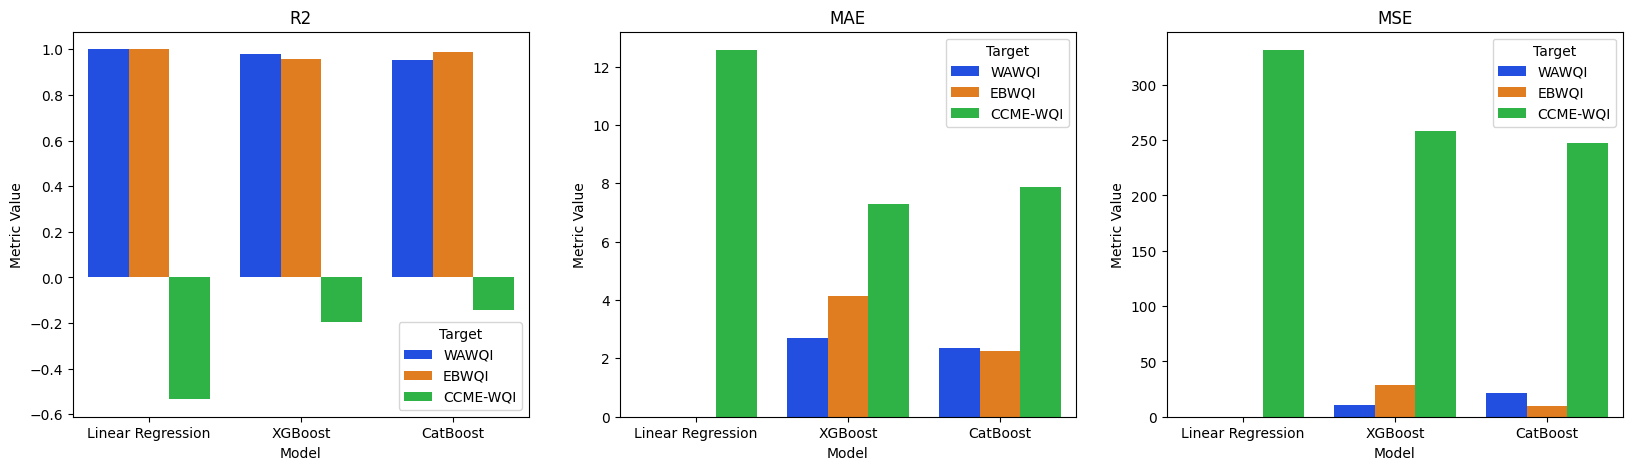

In [391]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

i = 0
ax = axes.flatten()
for metric in ['R2','MAE','MSE']:
        regression_df_tmp = regression_df[(regression_df['Model'].isin(['Linear Regression','XGBoost','CatBoost'])) & (regression_df['Metric'] == metric)]
        sns.barplot(data=regression_df_tmp, x='Model', y='Metric Value', hue='Target', ax=ax[i])
        ax[i].set_title(f'{metric}')
        i+=1

## 2. Classification

In [392]:
# create similar code just for classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

X = wqi.drop(['DISTRICT','LOCATION','WQI','EWQI','WQI_CLASSIF','EWQI_CLASSIF', 'CCME-WQI', 'CCME-WQI_CLASSIF'], axis=1)
X = StandardScaler().fit_transform(X)

y1 = wqi['WQI_CLASSIF']
y2 = wqi['EWQI_CLASSIF']
y3 = wqi['CCME-WQI_CLASSIF']

X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X, y1, y2, y3, test_size=0.2, random_state=42)

class_list = [0,1,2,3,4]

class_count_1 = y1_test.value_counts().values
class_count_2 = y2_test.value_counts().values
class_count_3 = y3_test.value_counts().values

class_weights_1 = compute_class_weight(class_weight='balanced', classes=np.unique(y1), y=y1)
class_weights_2 = compute_class_weight(class_weight='balanced', classes=np.unique(y2), y=y2)
class_weights_3 = compute_class_weight(class_weight='balanced', classes=np.unique(y3), y=y3)

class_weights_dict_1 = {class_label: weight for class_label, weight in zip(class_list, class_weights_1)}
class_weights_dict_2 = {class_label: weight for class_label, weight in zip(class_list, class_weights_2)}
class_weights_dict_3 = {class_label: weight for class_label, weight in zip(class_list, class_weights_3)}

# create a dictionary for model names and model object for multi class classification
models_multi = {
    'Random Forest': [
        RandomForestClassifier(class_weight=class_weights_dict_1),
        RandomForestClassifier(class_weight=class_weights_dict_2),
        RandomForestClassifier(class_weight=class_weights_dict_3)
        ],
    'XGBoost': [
        XGBClassifier(scale_pos_weight=1,num_classes=5, objective='multi:softmax'),
        XGBClassifier(num_classes=5, objective='multi:softmax'),
        XGBClassifier(num_classes=5, objective='multi:softmax')
        ],
    'CatBoost': [
        CatBoostClassifier(verbose=False,class_weights=class_weights_dict_1, loss_function='MultiClass'),
        CatBoostClassifier(verbose=False, class_weights=class_weights_dict_2, loss_function='MultiClass'),
        CatBoostClassifier(verbose=False, class_weights=class_weights_dict_3, loss_function='MultiClass')
        ],
    'LightGBM': [
        LGBMClassifier(class_weight=class_weights_dict_1, objective='multiclass', metrics='multi_logloss'), 
        LGBMClassifier(class_weight=class_weights_dict_2, objective='multiclass', metrics='multi_logloss'),
        LGBMClassifier(class_weight=class_weights_dict_3, objective='multiclass', metrics='multi_logloss')
        ],
    # 'Multi Layer Perceptron': MLPClassifier()
}

In [398]:
print(class_weights_dict_1)
print(class_weights_dict_2)
print(class_weights_dict_3)

class_weights_dict_2.update({3:0,4:0})
class_weights_dict_3.update({4:0})

print(class_weights_dict_1)
print(class_weights_dict_2)
print(class_weights_dict_3)

{0: 8.95, 1: 0.5264705882352941, 2: 0.7782608695652173, 3: 0.6280701754385964, 4: 8.95}
{0: 14.916666666666666, 1: 0.9040404040404041, 2: 0.5474006116207951, 3: 0, 4: 0}
{0: 0.8287037037037037, 1: 0.4068181818181818, 2: 44.75, 3: 3.1964285714285716}
{0: 8.95, 1: 0.5264705882352941, 2: 0.7782608695652173, 3: 0.6280701754385964, 4: 8.95}
{0: 14.916666666666666, 1: 0.9040404040404041, 2: 0.5474006116207951, 3: 0, 4: 0}
{0: 0.8287037037037037, 1: 0.4068181818181818, 2: 44.75, 3: 3.1964285714285716, 4: 0}


In [399]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, \
    confusion_matrix, log_loss, matthews_corrcoef, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Create a dictionary to store results
results_dict = {'Model': [], 'Target': [], 'Metric': [], 'Metric Value': []}

# create a list of metrics for classification
metrics = {
    # 'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    # 'Cohen\'s Kappa': cohen_kappa_score,
    # 'Confusion Matrix': confusion_matrix,
    # 'Log Loss': log_loss,
    # 'Matthews Correlation Coefficient': matthews_corrcoef,
    # 'ROC AUC Score': roc_auc_score
}

# Loop through models
for name, model in tqdm(models_multi.items()):
    for target_name, target_train, target_test in [('WAWQI', y1_train, y1_test), ('EBWQI', y2_train, y2_test), ('CCME-WQI', y3_train, y3_test)]:
        for metric_name, metric_func in metrics.items():
            # Train the model
            if (target_name=='WAWQI'):
                model1 = model[0]
            elif (target_name=='EBWQI'):
                model1 = model[1]
            else:
                model1 = model[2]

            model1.fit(X_train, target_train)
            y_pred_1 = model1.predict(X_test)

            metric_value_1 = 0

            metric_value_1 = metric_func(target_test, y_pred_1, average='macro')

            # Store results in the dictionary
            results_dict['Model'].append(name)
            results_dict['Target'].append(target_name)
            results_dict['Metric'].append(metric_name)
            results_dict['Metric Value'].append(metric_value_1)

# Create a DataFrame
df_classif = pd.DataFrame(results_dict)

# Print the DataFrame
df_classif

  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [00:00<00:02,  1.39it/s]

[09:07:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_classes", "scale_pos_weight" } are not used.

[09:07:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_classes", "scale_pos_weight" } are not used.

[09:07:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "num_classes", "scale_pos_weight" } are not used.



ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [2 3 4]

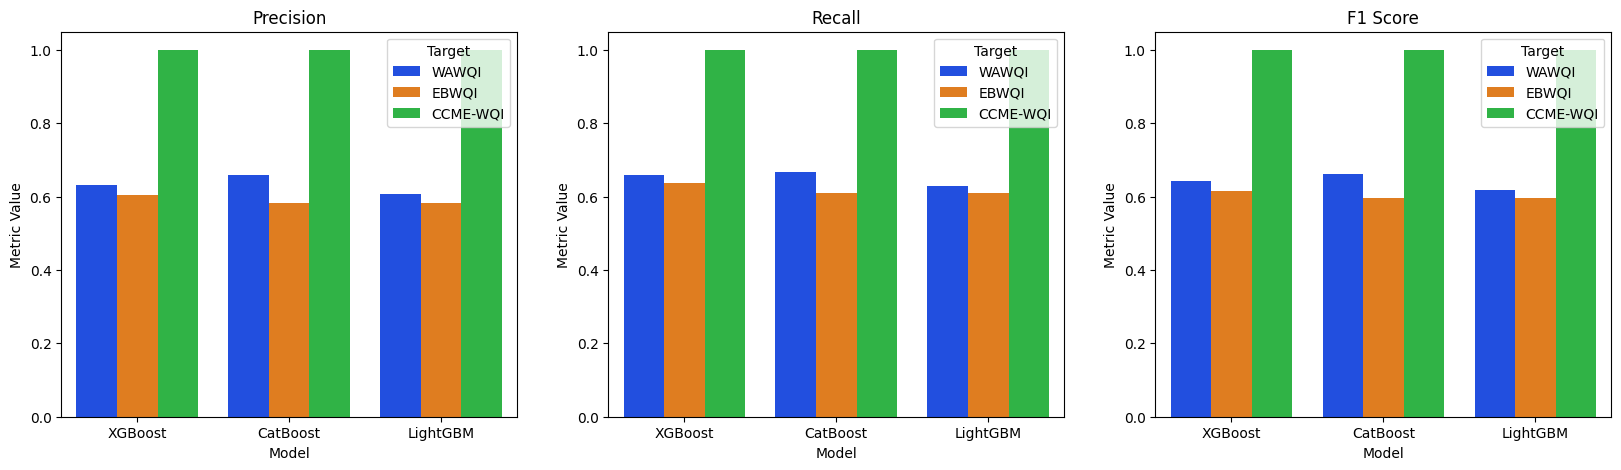

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(20,5))

i = 0
ax = axes.flatten()
for metric in ['Precision','Recall','F1 Score']:
        df_filtered = df_classif[(df_classif['Model'].isin(['LightGBM','XGBoost','CatBoost'])) & (df_classif['Metric'] == metric)]
        sns.barplot(data=df_filtered, x='Model', y='Metric Value', hue='Target', ax=ax[i])
        ax[i].set_title(f'{metric}')
        i+=1